# AE4465 (MM&A) - Lecture4 (Moving Average)

In statistics, a Moving Average (MA) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

Moving averages are widely used for example to understand signal movement patterns such as spare part demand. Other times, we can use moving averages to forecast the next value of a univariate signal.

The moving average is a technique to get a general idea of the trends in a data set; it is an average of any subset of numbers.

$$f_{t+1} =\frac{1}{m} \sum_{k=0}^{m-1} y_{t-k}$$

where
$f_{t+1}$ is the forecast of the next value
$m$ is the window size
$y$ is the signal value at some moment in time

Below you have simple example of how the moving average works:

&nbsp;
<center><img top-margin="10px" alt="Moving average" src="imgs\ma.png" width="700"/></center>

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the data in csv file
sparepartdemand_dt = pd.read_csv('data/les04_MAdata.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(sparepartdemand_dt.columns, range(len(sparepartdemand_dt.columns))):
    print(i, '- Column: ', colname)
# print the 5 first rows of the dataframe
print(sparepartdemand_dt.head())


The columns of the csv file are: 
0 - Column:  Parameter 1
1 - Column:  Parameter 2
2 - Column:  Parameter 3
3 - Column:  Parameter 4
4 - Column:  Parameter 5
5 - Column:  Parameter 6
6 - Column:  Parameter 7
7 - Column:  Parameter 8
8 - Column:  Parameter 9
9 - Column:  Parameter 10
10 - Column:  Parameter 11
   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26 

### Implementation and Smoothing example

A simple way to implement Moving Average is by using the python function rolling from the pandas package. We will now use the data in the example csv to generate moving average with different window sizes (5, 30 and 100). The adjustment of the exact window size depends on the goal of the analysis and the case study.

In [24]:
# Smoothing example - varying window sizes lead to different smooth results
param1 = sparepartdemand_dt['Parameter 1']

param1_ma_w30 = param1.rolling(30).mean()
param1_ma_w5 = param1.rolling(5).mean()
param1_ma_w100 = param1.rolling(100).mean()

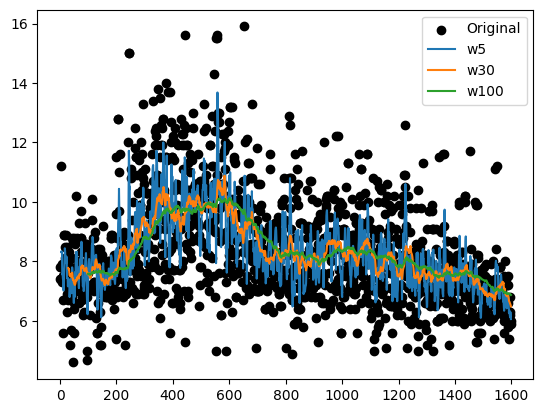

In [25]:
plt.scatter(range(len(param1)), param1, label='Original', c='black')
plt.plot(param1_ma_w5, label='w5')
plt.plot(param1_ma_w30, label='w30')
plt.plot(param1_ma_w100, label='w100')
plt.legend()
plt.show()

### Outlier detection
This technique can be used to detect outliers (trend analysis):

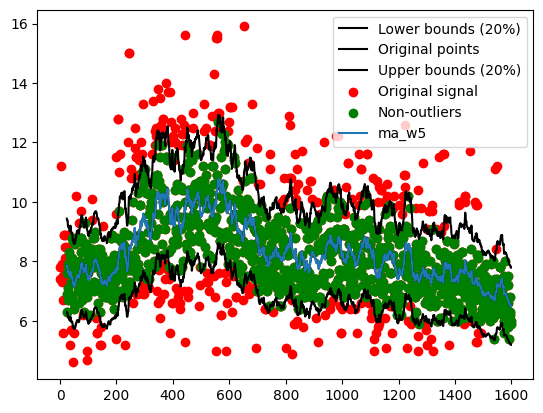

In [41]:
# Outlier detection example
param1 = sparepartdemand_dt['Parameter 1']

param1_ma_w5 = param1.rolling(25).mean() # moving average

non_outliers = []
for par, par_ma in zip(param1, param1_ma_w5):
    if par_ma * 1.2 > par > par_ma * 0.8:
        non_outliers.append(par)
    else:
        non_outliers.append(None)

plt.plot(range(len(param1_ma_w5)), param1_ma_w5 * 0.80, label='Lower bounds (20%)', c='black')
plt.plot(range(len(param1_ma_w5)), param1_ma_w5, label='Original points', c='black')
plt.plot(range(len(param1_ma_w5)), param1_ma_w5 * 1.20, label='Upper bounds (20%)', c='black')
plt.scatter(range(len(param1)), param1, label='Original signal', c='red')
upper = param1.values[param1.values < param1_ma_w5 * 1.20]
plt.scatter(range(len(non_outliers)), non_outliers, label='Non-outliers', c='green')
plt.plot(param1_ma_w5, label='ma_w5')
plt.legend()
plt.show()